<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Исследуем-точность-трёх-модели-:" data-toc-modified-id="Исследуем-точность-трёх-модели-:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Исследуем точность трёх модели :</a></span></li><li><span><a href="#Исследуем-баланс-классов-выборки" data-toc-modified-id="Исследуем-баланс-классов-выборки-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Исследуем баланс классов выборки</a></span></li><li><span><a href="#Проверим-модели-на-адекватность" data-toc-modified-id="Проверим-модели-на-адекватность-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Проверим модели на адекватность</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.0.3"><span class="toc-item-num">3.0.3&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.0.4"><span class="toc-item-num">3.0.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.


## Задача

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.utils import shuffle


In [2]:
# выводим информацию о данных 
df = pd.read_csv ('/Users/urvanov_aleksandr/yandex-praktikum/churn_bank_customers/data_churn.csv')
display(df.shape)
df.info()
display(df)

(10000, 14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [3]:
# проверяем наличие пропусков в данных
df.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [4]:
# удаляем строки с пропусками, замена средним или медианным значением некорректна
df = df.dropna(subset=['Tenure']).reset_index(drop=True)

In [5]:
display(df)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9086,9995,15719294,Wood,800,France,Female,29,2.0,0.00,2,0,0,167773.55,0
9087,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9088,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9089,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1


In [6]:
# выведем наличие аномальных данных при пользовании '0 лет' 
display(df.query('Tenure == 0'))

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
29,30,15656300,Lucciano,411,France,Male,29,0.0,59697.17,2,1,1,53483.21,0
34,36,15794171,Lombardo,475,France,Female,45,0.0,134264.04,1,1,0,27822.99,1
53,58,15647091,Endrizzi,725,Germany,Male,19,0.0,75888.20,1,0,0,45613.75,0
67,73,15812518,Palermo,657,Spain,Female,37,0.0,163607.18,1,0,1,44203.55,0
115,128,15782688,Piccio,625,Germany,Male,56,0.0,148507.24,1,1,0,46824.08,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8905,9794,15772363,Hilton,772,Germany,Female,42,0.0,101979.16,1,1,0,90928.48,0
8910,9800,15722731,Manna,653,France,Male,46,0.0,119556.10,1,1,0,78250.13,1
8952,9844,15778304,Fan,646,Germany,Male,24,0.0,92398.08,1,1,1,18897.29,0
8972,9869,15587640,Rowntree,718,France,Female,43,0.0,93143.39,1,1,0,167554.86,0


382 объекта с нулевым временем учета данных, при наличии активных продуктов и ненулевого баланса - эта аномалия 0.3% данных. При построении модели может внести 'смуту' в модель, решено убрать эти данные.

In [7]:
df = df.query('Tenure != 0').reset_index(drop=True)

In [8]:
display(df)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8704,9995,15719294,Wood,800,France,Female,29,2.0,0.00,2,0,0,167773.55,0
8705,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
8706,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
8707,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1


In [9]:
# проверяем данные на наличие дубликатов
df.duplicated().sum()

0

Удалим столбцы, которые не повлияют на построение модели

In [10]:
drop = ['RowNumber','CustomerId', 'Surname']
df = df.drop(drop, axis=1)
display(df)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
8704,800,France,Female,29,2.0,0.00,2,0,0,167773.55,0
8705,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
8706,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
8707,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1


Завершили предобработку данных, начнем подготовку данных к исследованию.

In [11]:
# кодируем категориальные переменные, избегаем дамми-ловушку
df_ohe = pd.get_dummies(df, drop_first=True)

# извлекаем целевой признак
target = df_ohe['Exited']

# извлекаем признаки
features = df_ohe.drop(['Exited'], axis=1)



# выделяем 60% данных для обучающей выборки, остальные данные для тестовой и валидационной.
features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, test_size = 0.4, 
                                                                            random_state = 12345)
# разделяем тестовую и валидационную выборку часть на равные части 
features_valid, features_test, target_valid, target_test = train_test_split(features_test, 
                                                                            target_test, test_size = 0.5, 
                                                                            random_state = 12345)


# стандартизуем данные, приводим к одному масштабу
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

# создадим объект структуры и настроим его на обучающих данных
scaler = StandardScaler()
scaler.fit(features_train[numeric])

# преобразуем обучающую, валидационную и тестовую выборки функцией transform()
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

# чтобы не появлялось предупреждение
pd.options.mode.chained_assignment = None

print(features_train.shape)


(5225, 11)


#### Вывод 

По результату предобработки данных было выявлено 382 строки с нулевой продолжительностью пользования услугами банка, по факту, клиенты с действующими продуктами и ненуливыми балансами. Этих данных около 0.3%, были  удалены. 9% от всех записей были удалены из-за пропусков в столбце продолжительности лет, которых человек является клиентом банка, замена средним или медианным значением некорректна, что может дать неясную картину. По итогу подготовки данных кодировали категориальные переменные, применили маневр для избежания дамми-ловушки. Также стандартизировали данные - привели к одному масштабу. Данные готовы к исследованию.

## Исследование задачи

### Исследуем точность трёх модели :

In [44]:
# логистическая регрессия

model_logistic = LogisticRegression(solver = 'liblinear')
model_logistic.fit(features_train, target_train)
log_prediction = model_logistic.predict(features_valid)
result = f1_score(target_valid, log_prediction)

print("F1-мера", result)

F1-мера 0.31640624999999994


In [58]:
# дерево решений

best_model = None
best_result = 0
best_depth = 0

for depth in range(1, 16):
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth, min_samples_leaf = 9)
    model_tree.fit(features_train, target_train)
    tree_prediction = model_tree.predict(features_valid)
    result = f1_score(target_valid, tree_prediction)
    if result > best_result:
        best_model = model_tree
        best_result = result
        best_depth = depth
print("F1-мера", best_result, "Глубина дерева:", best_depth)        



F1-мера 0.586046511627907 Глубина дерева: 7


In [14]:
model_tree = DecisionTreeClassifier(random_state=12345, max_depth=7, min_samples_leaf = 9)
model_tree.fit(features_train, target_train)
tree_prediction = model_tree.predict(features_valid)
    

In [92]:
# случайный лес

best_model = None
best_result = 0
best_est = 0
best_depth = 0

for est in range(10,101,10):
    for depth in range(1, 16, 1):
        model_forest = RandomForestClassifier(
             n_estimators=est, max_depth=depth, min_samples_split =14, random_state=12345)
        model_forest.fit(features_train, target_train)
        forest_prediction = model_forest.predict(features_valid)
        result = f1_score(target_valid, forest_prediction)
        if result > best_result:
            best_model = model_forest
            best_result = result
            best_est = est
            best_depth = depth
            
print("F1-мера", best_result, "Количество деревьев:",
      best_est, "Максимальная глубина:", best_depth)
    

F1-мера 0.5970149253731344 Количество деревьев: 100 Максимальная глубина: 15


In [93]:
model_forest = RandomForestClassifier(
             n_estimators=100, max_depth=15, min_samples_split =14, random_state=12345)
model_forest.fit(features_train, target_train)
forest_prediction = model_forest.predict(features_valid)

Лучше всех показала себя модель "случайный лес" F1-мера= 0.5977, n = 100, depth = 15.

### Исследуем баланс классов выборки

0    0.797451
1    0.202549
Name: Exited, dtype: float64


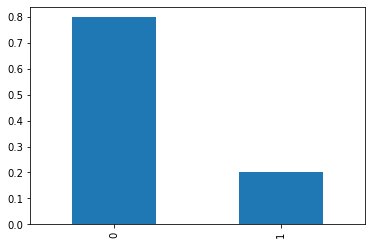

In [17]:
# проверим, как часто в целевом признаке встречается класс «1» или «0»
class_frequency = df['Exited'].value_counts(normalize=True)
print(class_frequency)

class_frequency.plot(kind='bar')
plt.show()

0    0.874856
1    0.125144
dtype: float64


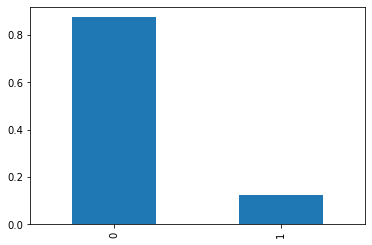

In [18]:
# проверяем, как часто в результатах предсказаний встречается класс «1» или «0»
predicted_valid = pd.Series(model_forest.predict(features_valid))

class_frequency = predicted_valid.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')
plt.show()

У обучающей и валидационной выборок наблюдается дисбаланс классов. Результат предсказаний моделей будет склоняться к большему варианту ответа.

### Проверим модели на адекватность

In [19]:
# логистическая регрессия

model_logistic = LogisticRegression(solver = 'liblinear')
model_logistic.fit(features_train, target_train)
log_model = pd.Series(
    model_logistic.predict(features_valid)).value_counts(normalize = True)
print(log_model)


0    0.925947
1    0.074053
dtype: float64


In [59]:
# дерево решений

model_tree = DecisionTreeClassifier(random_state=12345, max_depth=7, min_samples_leaf = 9)
model_tree.fit(features_train, target_train)
tree_model = pd.Series(
    model_tree.predict(features_valid)).value_counts(normalize = True)
print(tree_model)


0    0.849598
1    0.150402
dtype: float64


In [94]:
# случайный лес

model_forest = RandomForestClassifier(
             n_estimators=100, max_depth=15, min_samples_split =14, random_state=12345)
model_forest.fit(features_train, target_train)
forest_model = pd.Series(
    model_forest.predict(features_valid)).value_counts(normalize = True)
print(tree_model)


0    0.849598
1    0.150402
dtype: float64


In [22]:
# проверяем на константной модели, которая любому объекту прогнозирует класс "0"
target_pred_constant = pd.Series(0, index=target.index)
accuracy = accuracy_score(target, target_pred_constant)

display(accuracy)

0.7974509128487771

Построим ROC и изучим сопутствующие метрики precision, F-1 меру, AUC-ROC 

[[1279   80]
 [ 193  190]]
Точность 0.7037037037037037
F1-мера 0.5819295558958653
AUC-ROC 0.6803804825003793


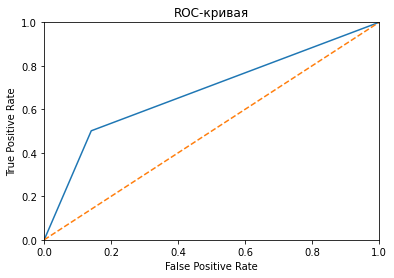

In [23]:
# матрица ошибок и ROC для дерева решений

tree_prediction_one_valid = model_tree.predict_proba(features_valid)[:, 1]
print(confusion_matrix(target_valid, tree_prediction))
print("Точность", precision_score(target_valid, tree_prediction))
print("F1-мера", f1_score(target_valid, tree_prediction))
print("AUC-ROC", roc_auc_score(target_valid, tree_prediction_one_valid))

fpr, tpr, thresholds = roc_curve(target_valid, tree_prediction_one_valid) 

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()



Большое количество FP, FN. 


[[1318   41]
 [ 206  177]]
Точность 0.8119266055045872
F1-мера 0.5890183028286189
AUC-ROC 0.8579357806096866


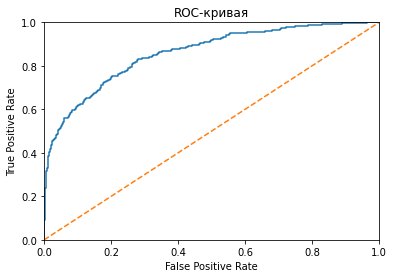

In [24]:
# матрица ошибок и ROC для случайного леса

forest_prediction_one_valid = model_forest.predict_proba(features_valid)[:, 1]
print(confusion_matrix(target_valid, forest_prediction))
print("Точность", precision_score(target_valid, forest_prediction))
print("F1-мера", f1_score(target_valid, forest_prediction))
print("AUC-ROC", roc_auc_score(target_valid, forest_prediction_one_valid))

fpr, tpr, thresholds = roc_curve(target_valid, forest_prediction_one_valid) 

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()



В данном случае FN, FP меньше. F1-мера и AUC-ROC показывает одно из лучших значений, но есть над чем работать.

[[1311   48]
 [ 302   81]]
Точность 0.627906976744186
F1-мера 0.31640624999999994
AUC-ROC 0.7550456582842936


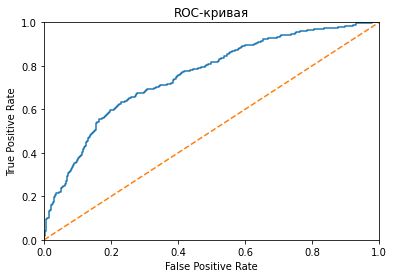

In [25]:
# матрица ошибок и ROC для логистическая регрессии 

log_prediction = model_logistic.predict(features_valid)
log_prediction_one_valid = model_logistic.predict_proba(features_valid)[:, 1]
print(confusion_matrix(target_valid, log_prediction))
print("Точность", precision_score(target_valid, log_prediction))
print("F1-мера", f1_score(target_valid, log_prediction))
print("AUC-ROC", roc_auc_score(target_valid, log_prediction_one_valid))

fpr, tpr, thresholds = roc_curve(target_valid, log_prediction_one_valid) 

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()


Логистическая регрессия однозначно проигрывает остальным моделям по всем значениям метрик. Зашкаливает FN.

## Борьба с дисбалансом

Дисбаланс попробуем побороть следующим методом. Напрямую укажем о дисбалансе при инициализации модели аргумент class_weight='balanced' и посмотрим, как поменяются значения метрик у исследуюмых моделей.

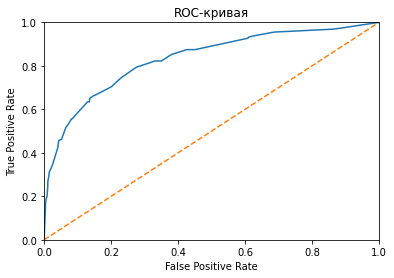

F1-мера 0.5730442978322338
AUC-ROC 0.8326666628241853


In [60]:
# дерево решений

model_tree = DecisionTreeClassifier(
    random_state=12345, max_depth=7, min_samples_leaf = 9, class_weight='balanced')
model_tree.fit(features_train, target_train)

tree_prediction = model_tree.predict(features_valid)
tree_prediction_one_valid = model_tree.predict_proba(features_valid)[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, tree_prediction_one_valid) 

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

print("F1-мера", f1_score(target_valid, tree_prediction))
print("AUC-ROC", roc_auc_score(target_valid, tree_prediction_one_valid))


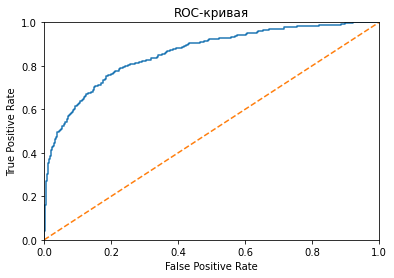

F1-мера 0.6281208935611038
AUC-ROC 0.8582547065593078


In [95]:
# случайный лес

model_forest = RandomForestClassifier(
    n_estimators=100, max_depth=15, min_samples_split =14, random_state=12345, class_weight='balanced')
model_forest.fit(features_train, target_train)

forest_prediction = model_forest.predict(features_valid)
forest_prediction_one_valid = model_forest.predict_proba(features_valid)[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, forest_prediction_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

print("F1-мера", f1_score(target_valid, forest_prediction))
print("AUC-ROC", roc_auc_score(target_valid, forest_prediction_one_valid))



F1-мера 0.31640624999999994
AUC-ROC 0.7550456582842936


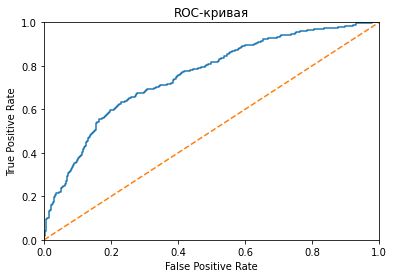

In [28]:
# логистическая регрессия

model = LogisticRegression(solver = 'liblinear', class_weight='balanced')
model.fit(features_train, target_train)

log_prediction = model_logistic.predict(features_valid)
log_prediction_one_valid = model_logistic.predict_proba(features_valid)[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, log_prediction_one_valid) 

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

print("F1-мера", f1_score(target_valid, log_prediction))
print("AUC-ROC", roc_auc_score(target_valid, log_prediction_one_valid))


#### Вывод  

По итогу применения аргумента class_weight='balanced' модель **Случайного леса** показала до: 
- F1-мера 0.6240
- AUC-ROC 0.8573

после введения аргумента class_weight='balanced':
- F1-мера 0.6158
- AUC-ROC 0.8484 
     
**Дерево решений** до:
- F1-мера 0.4744
- AUC-ROC 0.6630

после:
- F1-мера 0.5617
- AUC-ROC 0.8039

**Логическая регрессия** до:
- F1-мера 0.3164
- AUC-ROC 0.7550

после:
- F1-мера 0.3164
- AUC-ROC 0.7550

-------------
У модели логистической регрессии изменений нет. F1-мера улучшилась у модели дерева решений, у модели случайного леса наоборот ухудшилась. В целом модель случайного дерева показывает лучшие значения метрик. Для улучшения модели случайного леса попробуем дополнительно поработать с дисбалансом классов.
 ____

В нашей выборке отрицательных ответов ≈ 80%, положитительных ≈ 20%.
Для достижения баланса необходимо увеличить количество положительных ответов в 4 раза для баланса или уменьшить количество отрицательных в 4 раза.

In [29]:
features_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
1234,-1.008902,0.193187,1.361334,0.771473,1,1,0,0.609133,0,0,0
3368,-0.639266,2.353035,-0.823351,-1.217800,1,1,1,1.545216,0,0,0
186,-0.485251,-0.745878,0.997220,-1.217800,2,1,1,1.202617,0,0,1
8346,-0.300433,1.507877,0.633106,0.878407,1,0,1,-0.428773,1,0,0
2839,1.958453,-0.745878,-1.187466,-1.217800,2,1,0,1.260191,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4478,-0.978099,-0.558065,-0.095123,0.819370,1,0,1,0.369419,0,1,1
4094,-0.043741,-1.966661,1.725449,-1.217800,2,0,1,-0.825074,0,0,1
3492,0.048668,-1.778848,0.633106,0.932220,1,0,0,-1.253840,0,0,0
2177,0.161612,0.005374,1.725449,-1.217800,2,1,0,0.044109,0,0,1


In [30]:
# функция для увеличения выборки
def upsample (features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [61]:
# применяем фунцкцию для увеличения положительных ответов в выборке дерева решений
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

model_tree = DecisionTreeClassifier(random_state=12345, min_samples_leaf =9, max_depth=7)
model_tree.fit(features_upsampled, target_upsampled)

tree_prediction = model_tree.predict(features_valid)
tree_prediction_one_valid = model_tree.predict_proba(features_valid)[:, 1]

print("Дерево решений:")
print ("F1:", f1_score(target_valid, tree_prediction))
print("AUC-ROC", roc_auc_score(target_valid, tree_prediction_one_valid))


Дерево решений:
F1: 0.5771812080536912
AUC-ROC 0.8324764599988088


In [96]:
# применяем фунцкцию для увеличения положительных ответов в выборке случайного леса

model_forest = RandomForestClassifier(
    n_estimators=100, max_depth=15, min_samples_split =14, random_state=12345)
model_forest.fit(features_upsampled, target_upsampled)

forest_prediction = model_forest.predict(features_valid)
forest_prediction_one_valid = model_forest.predict_proba(features_valid)[:, 1]

print("Случайный лес:")
print ("F1:", f1_score(target_valid, forest_prediction))
print("AUC-ROC", roc_auc_score(target_valid, forest_prediction_one_valid))



Случайный лес:
F1: 0.6283524904214559
AUC-ROC 0.8552287525192268


In [33]:
# применяем фунцкцию для увеличения положительных ответов в выборке логической регрессии

model_logistic = LogisticRegression(solver = 'liblinear')
model_logistic.fit(features_upsampled, target_upsampled)

log_prediction = model_logistic.predict(features_valid)
log_prediction_one_valid = model_logistic.predict_proba(features_valid)[:, 1]

print("Логическая регрессия:")
print ("F1:", f1_score(target_valid, log_prediction))
print("AUC-ROC", roc_auc_score(target_valid, log_prediction_one_valid))


Логическая регрессия:
F1: 0.5023786869647954
AUC-ROC 0.7592685452557845


#### Вывод 

По итогу применения функции 'upsamled' для увеличения положительных ответов в выборке модель **Случайного леса** показала до: 
- F1-мера 0.6240
- AUC-ROC 0.8573

после:
- F1-мера: 0.6385
- AUC-ROC 0.8544
     
**Дерево решений** до:
- F1-мера 0.4744
- AUC-ROC 0.6630

после:
- F1-мера: 0.5617
- AUC-ROC 0.8039

**Логическая регрессия** до:
- F1-мера 0.3164
- AUC-ROC 0.7550

после:
- F1-мера: 0.5023
- AUC-ROC 0.7592

-------------
Все 3 модели показали лучшие значения метрик. По - прежнему лидирует модель случайного леса. Попробуем уменьшить количество отрицательных ответов. 
 ____

In [34]:
# функция для уменьшения выборки

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled
    

In [62]:
# применяем функцию для уменьшения отрицательных ответов в выборке дерева решений
features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.25)

model_tree = DecisionTreeClassifier(random_state=12345, min_samples_leaf = 9, max_depth=7)
model_tree.fit(features_downsampled, target_downsampled)

tree_prediction = model_tree.predict(features_valid)
tree_prediction_one_valid = model_tree.predict_proba(features_valid)[:, 1]

print("Дерево решений:")
print ("F1:", f1_score(target_valid, tree_prediction))
print("AUC-ROC", roc_auc_score(target_valid, tree_prediction_one_valid))




Дерево решений:
F1: 0.5689320388349515
AUC-ROC 0.8226137710688054


In [97]:
# применяем функцию для уменьшения отрицательных ответов в выборке случайного леса

model_forest = RandomForestClassifier(
    n_estimators=100, max_depth=15, min_samples_split =14, random_state=12345)
model_forest.fit(features_downsampled, target_downsampled)

forest_prediction = model_forest.predict(features_valid)
forest_prediction_one_valid = model_forest.predict_proba(features_valid)[:, 1]

print("Случайный лес:")
print ("F1:", f1_score(target_valid, forest_prediction))
print("AUC-ROC", roc_auc_score(target_valid, forest_prediction_one_valid))



Случайный лес:
F1: 0.5905905905905906
AUC-ROC 0.8471845178742626


In [37]:
# применяем функцию для уменьшения отрицательных ответов в выборке логической регрессии

model_logistic = LogisticRegression(solver = 'liblinear')
model_logistic.fit(features_downsampled, target_downsampled)

log_prediction = model_logistic.predict(features_valid)
log_prediction_one_valid = model_logistic.predict_proba(features_valid)[:, 1]

print("Логическая регрессия:")
print ("F1:", f1_score(target_valid, log_prediction))
print("AUC-ROC", roc_auc_score(target_valid, log_prediction_one_valid))


Логическая регрессия:
F1: 0.49250936329588013
AUC-ROC 0.7554913861174992


#### Вывод  

По итогу применения функции 'downsampled' для уменьшения отрицательных ответов в выборке модель **Случайного леса** показала до: 
- F1-мера 0.6240
- AUC-ROC 0.8573

после:
- F1-мера: 0.5892
- AUC-ROC 0.8418
     
**Дерево решений** до:
- F1-мера 0.4744
- AUC-ROC 0.6630

после:
- F1-мера: 0.5599
- AUC-ROC 0.8029

**Логическая регрессия** до:
- F1-мера 0.3164
- AUC-ROC 0.7550

после:
- F1-мера: 0.4925
- AUC-ROC 0.7554

-------------
Все 3 модели показали разнонаправленные значения, но лидирует модель случайного леса с применением функции увеличения положительных ответов в выборке. Для наглядности выведем таблицу.
 ____

In [38]:
# в первом столбце значение с дисбалансом, последующие значения с методами борьбы с дисбалансом
data_forest = [{'Случайный лес': 0.6240, 'class_weight': 0.6158, 'upsampled': 0.6385, 'downsampled':  0.5892},
              {'Случайный лес': 0.8573, 'class_weight': 0.8484, 'upsampled':  0.8544, 'downsampled':  0.8418}] 
dframe_forest = pd.DataFrame(data_forest, index =['F1-мера', 'AUC-ROC']) 

data_tree = [{'Дерево решений': 0.4744, 'class_weight': 0.5617, 'upsampled': 0.5617, 'downsampled':  0.5599}, 
             {'Дерево решений': 0.6630, 'class_weight': 0.8039, 'upsampled': 0.8039, 'downsampled':  0.8029}] 
dframe_tree = pd.DataFrame(data_tree, index =['F1-мера', 'AUC-ROC']) 

data_log = [{'Логическая регрессия': 0.3164, 'class_weight': 0.3164, 'upsampled': 0.5023, 'downsampled': 0.4925},
           {'Логическая регрессия':  0.7550, 'class_weight': 0.7550, 'upsampled': 0.7592, 'downsampled': 0.7554}]
dframe_log = pd.DataFrame(data_log, index=['F1-мера', 'AUC-ROC'])

display(dframe_tree)
display(dframe_log)
display(dframe_forest)



,Дерево решений,class_weight,upsampled,downsampled
F1-мера,0.4744,0.5617,0.5617,0.5599
AUC-ROC,0.6630,0.8039,0.8039,0.8029


,Логическая регрессия,class_weight,upsampled,downsampled
F1-мера,0.3164,0.3164,0.5023,0.4925
AUC-ROC,0.7550,0.7550,0.7592,0.7554


,Случайный лес,class_weight,upsampled,downsampled
F1-мера,0.6240,0.6158,0.6385,0.5892
AUC-ROC,0.8573,0.8484,0.8544,0.8418


 Финальная модель будет выглядеть следующим образом:

Полнота 0.6422976501305483
Точность 0.615
F1-мера 0.6283524904214559
AUC-ROC 0.8552287525192268


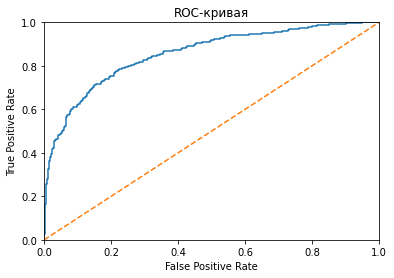

In [98]:
model_final = RandomForestClassifier(
    n_estimators=100, max_depth=15, min_samples_split =14, random_state=12345)
model_final.fit(features_upsampled, target_upsampled)
predicted_valid = model_final.predict(features_valid)
predicted_one_valid = model_final.predict_proba(features_valid)[:, 1]

print("Полнота" , recall_score(target_valid, predicted_valid))
print("Точность", precision_score(target_valid, predicted_valid))
print("F1-мера", f1_score(target_valid, predicted_valid))
print("AUC-ROC", roc_auc_score(target_valid, predicted_one_valid))

fpr, tpr, thresholds = roc_curve(target_valid, predicted_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()


#### Вывод  

Как видно из результатов техникой upsampling удалось улучшить качество (метрику F1-мера) c 0.6240 до 0.6383, что явлется лучшим значением из всех моделей, также как и значение оптимально ROC-AUC = 0.8552. Проверим модель на тестовой выборке.

## Тестирование модели

In [99]:
# для модели случайного леса с лучшей F1-мерой и ROC-AUC
model_test = RandomForestClassifier(
    n_estimators=100, max_depth=14, min_samples_split =15, random_state=12345)
model_test.fit(features_upsampled, target_upsampled)

predicted_test = model_test.predict(features_test)
predicted_one_test = model_test.predict_proba(features_test)[:, 1]

print("Полнота" , recall_score(target_test, predicted_test))
print("Точность", precision_score(target_test, predicted_test))
print("F1-мера", f1_score(target_test, predicted_test))
print("AUC-ROC", roc_auc_score(target_test, predicted_one_test))

fpr, tpr, thresholds = roc_curve(target_test, predicted_one_test)




Полнота 0.6220238095238095
Точность 0.5870786516853933
F1-мера 0.6040462427745664
AUC-ROC 0.8562157081893924


## Вывод

In [41]:
display(dframe_tree)
display(dframe_log)
display(dframe_forest)

,Дерево решений,class_weight,upsampled,downsampled
F1-мера,0.4744,0.5617,0.5617,0.5599
AUC-ROC,0.6630,0.8039,0.8039,0.8029


,Логическая регрессия,class_weight,upsampled,downsampled
F1-мера,0.3164,0.3164,0.5023,0.4925
AUC-ROC,0.7550,0.7550,0.7592,0.7554


,Случайный лес,class_weight,upsampled,downsampled
F1-мера,0.6240,0.6158,0.6385,0.5892
AUC-ROC,0.8573,0.8484,0.8544,0.8418


По результату предобработки данных было выявлено 382 строки с нулевой продолжительностью пользования услугами банка, по факту, клиенты с действующими продуктами и ненуливыми балансами. Этих данных около 0.3%, были удалены. По итогу подготовки данных кодировали категориальные переменные, применили маневр для избежания дамми-ловушки. Также стандартизировали данные - привели к одному масштабу.

-------------
 Для улучшения модели случайного леса дополнительно поработали с дисбалансом классов. Как видно из результатов техникой usampling удалось улучшить качество (метрику F1-мера) c 0.6240 до 0.6385. Модель на тестовой выборке достигла необходимого бейзлайна в >=0.59 и F1-мера = 0.6069. 
 ____________
 
- Полнота 0.62
- Точность 0.58
- F1-мера 0.60
- AUC-ROC 0.85

Модель характеризуется высоким показателем AUC-ROC = 0.85, поэтому она с высокой вероятностью предскажит уход клиента из банка.
Показатель точности не высокий = 0.58 — модель верно предсказывает только чуть больше половины ухода клиентов, также как и полнота = 0.62. 
С точки зрения бизнеса полученная модель поможет маркетологам лучше определять килентов, которые могут уйти в ближайшее время. 

